## Mask registration pipeline example

The mask registration pipeline diffeomorphically registers an atlas to an input image using their masks. In this example we'll register the Allen Reference Atlas to a given input image.


## Downloading Images from OCP
The ndreg module is based on SimpleITK.  It contains image processing and registration file operations.

In [1]:
from ndreg import *

First we need to specify our working directories.

In [3]:
workDirPath = "/tmp/"
downloadDirPath = workDirPath + "0_download/"

Next the input image is downloaded to the working directory at the lowest possible resolution.  Since the extension of the image is .img, a Nifti image will be written.

In [5]:
inToken = "inputToken"
inPath = downloadDirPath+inToken+".img"
imgDownload(inToken, inPath, resolution=5)

Lets open the downloaded image.

In [6]:
inPath = downloadDirPath+inToken+".img"
inImg = imgRead(inPath)

We can easily display an image slice. Since inImg is a SimpleITK image we need convert it to a numpy array before displaying.

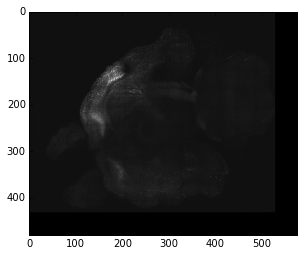

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
inArray = sitk.GetArrayFromImage(inImg)
plt.imshow(inArray[100,:,:], cmap = "gray") 

Next we download the Allen Reference Atlas (ARA). Its image data is stored in the "nissl" channel while it's labels are stored in the "annotation" channel.

In [9]:
atlasToken = "ara_ccf2"
atlasImageChannel = "nissl"
atlasLabelChannel = "annotation"

atlasPath = downloadDirPath+atlasToken+"_"+atlasImageChannel+".img"
imgDownload(atlasToken, atlasPath, channel=atlasImageChannel)

atlasLabelPath = downloadDirPath+atlasToken+"_"+atlasLabelChannel+".img"
imgDownload(atlasToken, atlasLabelPath, channel=atlasLabelChannel)

'/tmp/0_download/ara_ccf2_annotation.img'

Let's display a coronal slice of the atlas with the labels overlaid.

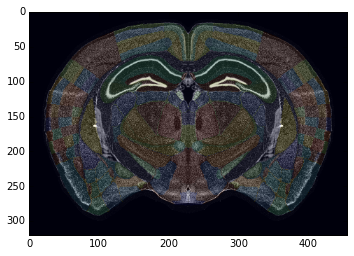

In [11]:
atlasImg = imgRead(atlasPath)
atlasArray = sitk.GetArrayFromImage(atlasImg)

atlasLabel = imgRead(atlasLabelPath)
atlasLabelArray = sitk.GetArrayFromImage(atlasLabel)

z = 300
plt.imshow(atlasArray[z,:,:], cmap = "gray")
plt.imshow(atlasLabelArray[z,:,:], alpha = 0.1, vmax=1000)

## Running the mask registration pipeline

Now we can run the mask registraton pipeline.  To do this we provide paths for the input image, atlas image, atlas labels and an output directory ("pipelineDirPath").  Optionally we can specify the resolution ("spacing") at which to run the registration and thresholds used to generate the brain masks.  Since atlas and input images have differnt orientations an initial affine transform is provided.

In [12]:
pipelineDirPath = workDirPath + "1_pipeline/"

# Resolution at which to run registration
spacing = [0.25,0.25,0.25]

# Thresholds used to generate brain masks
inThreshold = 105
atlasThreshold = 1

#Provide initial affine transform
atlasSize = atlasImg.GetSize()
atlasSpacing = atlasImg.GetSpacing()
atlasSizeMM = array(atlasSize)*array(atlasSpacing)
initialAffine = [0,1,0,0,0,-1,1,0,0,0,atlasSizeMM[1],0]

# Run the mask registration pipeline
maskPipeline(inPath, atlasPath, atlasLabelPath, pipelineDirPath, spacing, initialAffine, inThreshold, atlasThreshold)

Downsampling
Generating Masks
Registering Masks
--- Getting Original Data
--- Applying initial affine
--- Rigid Registration
--- Affine Registration
--- Diffeomorphic Registrration
Applying Deformation Field


'/tmp/1_pipeline/inputToken.img'

Finally we can display the the results of the registration by overlaying the deformed atlas labels over the input image.

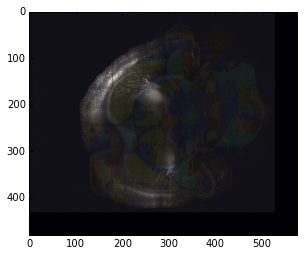

In [13]:
outLabelsPath = pipelineDirPath+os.path.basename(atlasLabelPath)
outLabelArray = sitk.GetArrayFromImage(imgRead(outLabelsPath))

z = 125
plt.imshow(inArray[z,:,:], cmap="gray")
plt.imshow(outLabelArray[z,:,:], alpha = 0.05, vmin=0, vmax=1000)